# Project : Stack Overflow 2018 Developer Survey

<b>Group Members (Group 23):
    <ol><li>Xin Zou
    <li>Qing Zhang
    <li>Pratik Khandelwal

# Question

If you are a developer and wanted to know <br>
<b>What parameters will get you a higher pay?

# <U> 1. Dataset Description

In order to come up with the solution. We have choosen<b> 'Stack Overflow 2018 Developer Survey'.</b> Each year, Stack Overflow asks the developer community about everything from their favorite technologies, salaries to their job preferences. As 'Stack Overflow' is widely used by the developers, this dataset is most suitable to analyse salaries across various parameters.

Datset consists of 98,855 responses in 129 columns. <b>Each row represents a survey response by a developers.</b> Though the dataset contains lots of columns, we are interested in the below columns - 

<ul><li><b>Converted Salary</b> - Annual Salary in $ (for each developer).</b>
<li><b>Education</b> - Education level of the developer who filled this survey.
<li><b>Years Coding Professionally</b> - Number of years since coding professionally.
<li><b>Last New Job - </b> When was the last time that you took a job with a new employer? (in years)
<li><b>Technical Skills Areas</b>
<ul>
        <li><b>DevType</b> -Development Types.
        <li><b>Language Worked With</b> - Which programming, scripting, and markup languages you worked in past.
        <li><b>Database Worked With </b> - Database environments that you have worked in.
        <li><b>Platform Worked With </b> - Platforms that you have worked in.
        <li><b>Framework Worked With</b> - Libraries, frameworks, and tools that you have worked in.
        <li><b>IDE</b> - Development environment(s) you use regularly. </ul>
<li><b>Gender</b> - Your gender.
<li><b>Country</b> - Your current resident country. (Data is from 189 countries)</ul>


# <U>2. Data Preparation

Import libraries and reading the data file ('survey_results_public.csv').

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv('survey_results_public.csv',encoding = "ISO-8859-1")

Populating the interactive namespace from numpy and matplotlib


Retriving the desired columns which we are going to use in our analysis.

In [99]:
col_list1 = ['Country','Employment','FormalEducation','Age','UndergradMajor','LastNewJob',\
            'YearsCodingProf','ConvertedSalary','DevType',\
           'LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','FrameworkWorkedWith','IDE','Gender']

df1 = df.loc[:,col_list1]
df2 = df1.copy()

<b>Gender - 2 categories (Male and Female)

There are many values inside gender.<b> We are only interested in 'Male'-1 & 'Female'-0.

In [100]:
#df1.Gender.unique()

#Only Male and Female
df2copy = df2.copy()
df2copy['Male'] = df2.Gender == 'Male'
df2copy['Female'] = df2.Gender == 'Female'
df2 =df2.loc[(df2copy.Male == True) | (df2copy.Female == True),:]
df2.Gender.replace('Male', 1,inplace=True)
df2.Gender.replace('Female', 0,inplace=True)

<b>Formal education categories (0 to 4)</b>
<ul>
    <li>1 - Master 'Masterâ\x80\x99s degree (MA, MS, M.Eng., MBA, etc.)',
    <li>1 - Doctoral - ''Other doctoral degree (Ph.D, Ed.D., etc.)',
    <li>0- for all the below values <ul>
        <li>'Primary/elementary school',
        <li>'I never completed any formal education',
        <li>'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',] 
        <li>Drop out -'Some college/university study without earning a degree'
        <li>Bachelor - 'Bachelorâ\x80\x99s degree (BA, BS, B.Eng., etc.)'
        <li>Associate degree', 'Professional degree (JD, MD, etc.)'
        <li><b>Also, we considered NA's as 0. </ul>

In [101]:
df2['HigherEd'] =((df2.FormalEducation.str.match('.*Bachelor.*') * 0) +\
                  (df2.FormalEducation.str.match('.*Master.*') * 1) + \
                  (df2.FormalEducation.str.match('.*doctoral.*')*1)+ \
                  (df2.FormalEducation.str.match('.*Associate.*')*0)+ \
                  (df2.FormalEducation.str.match('.*Primary.*')*0)+ \
                  (df2.FormalEducation.str.match('.*never.*')*0)+\
                  (df2.FormalEducation.str.match('.*Secondary.*')*0)+\
                  (df2.FormalEducation.str.match('.*Drop.*')*0))

df2.loc[df2.HigherEd.isna(),'HigherEd']= 0

<b> Total technical skills
<ul><li><b>Total Languages</b> - Total languages a developer know.
    <li><b>Total Dev Types</b> - Total development skills a developer has. 
        <li><b>Total databases</b> - Total database skills. 
            <li><b>Total Platform</b> -  Total platforms a developer know. 
                <li><b>Total Framework</b> - Total frameworks a developer know.
                    <li><b>Total IDE'</b> -Total IDE a developer know.
                        
<li><b><u>Total Technical Skills - Sum of all the above skills.

In [102]:
df2['Total_Languages'] = df2.LanguageWorkedWith.str.count(';')+1
df2['Total_DevTypes'] = df2.DevType.str.count(';')+1
df2['Total_Databases'] = df2.DatabaseWorkedWith.str.count(';')+1
df2['Total_PlatformWorkedWith'] = df2.PlatformWorkedWith.str.count(';')+1
df2['Total_FrameworkWorkedWith'] = df2.FrameworkWorkedWith.str.count(';')+1
df2['Total_IDE'] = df2.IDE.str.count(';')+1

df2['Total_Tech'] = df2.Total_Languages+df2.Total_DevTypes+df2.Total_Databases+df2.Total_PlatformWorkedWith+df2.Total_FrameworkWorkedWith+df2.Total_IDE

<b>Years of coding </b>
<ol><li> 0 - 2years 
    <li> 3 - 5 years
    <li> 6-8 years
    <li> 9-11 years
    <li> 12-14 years
    <li> 15-17 years
        <li> 18-20 years
            <li> 21-23 years
                <li> 24-26 years
                    <li> 27-29 years
                        <li> 30 or more years
</ol>
<b>NA's are replaced by 1 (i.e. 0-2 years of experience).

In [103]:
df2['YearsCodingProf1']=((df2.YearsCodingProf.str.match('.*0-2 years.*') * 1)\
                         +(df2.YearsCodingProf.str.match('.*3-5 years.*') * 2) +\
                         (df2.YearsCodingProf.str.match('.*6-8 years.*') * 3) +\
                         (df2.YearsCodingProf.str.match('.*9-11 years.*') * 4)+\
                         (df2.YearsCodingProf.str.match('.*12-14 years.*') * 5) +\
                         (df2.YearsCodingProf.str.match('.*15-17 years.*') * 6) +\
                         (df2.YearsCodingProf.str.match('.*18-20 years.*') * 7) +\
                         (df2.YearsCodingProf.str.match('.*21-23 years*') * 8) +\
                         (df2.YearsCodingProf.str.match('.*24-26 years.*') * 9) +\
                         (df2.YearsCodingProf.str.match('.*27-29 years.*') * 10) +\
                         (df2.YearsCodingProf.str.match('.*30 or more years.*') * 11))

df2.loc[df2.YearsCodingProf1.isna(),'YearsCodingProf1']=1

<b>Converted Median Salary</b> - Calculated median salary of each country.

We have used median salary instead of mean. It's because we have few outliers in the dataset and median is not affected by outliers.
Replaced NA's and zero's with respective country's median salary.

In [104]:
df2['Country_Median_Salary'] = df2.groupby('Country')['ConvertedSalary'].transform('median')
df2.loc[df2.ConvertedSalary.isna(),'ConvertedSalary']=df2['Country_Median_Salary']
df2.loc[df2.Total_Tech.isna(),'Total_Tech']=df2.Total_Tech.mean()
df2.loc[df2.ConvertedSalary==0,'ConvertedSalary']=df2['Country_Median_Salary']

<b>Greater Country Median</b> - Is Developer Salary greater than their country's median salary? 1- Yes, 0- No.

In [105]:
#Salary greater than country average salary
df2['Greater_Country_Median'] = df2.ConvertedSalary > df2.Country_Median_Salary
df2.loc[(df2.Greater_Country_Median == True),'Greater_Country_Median'] = 1
df2.loc[(df2.Greater_Country_Median == False),'Greater_Country_Median'] = 0

<b>Last New Job</b>
<ol><li><b>I've never had a job</b>
    <li><b>Less than a year ago</b>
        <li><b>Between 1 and 2 years ago</b>
            <li><b>Between 2 and 4 years ago</b>
                <li><b>More than 4 years ago</b>   
</ol>
Replaced NA's with 1.

In [106]:
df2['LastNewJob1'] = (df2.LastNewJob.str.match('.*Less.*') * 2)+\
(df2.LastNewJob.str.match('.*More.*') * 5)+\
(df2.LastNewJob.str.match('.*1 and 2.*') * 3)+\
(df2.LastNewJob.str.match('.*2 and 4.*') * 4)+\
(df2.LastNewJob.str.match('.*never.*') * 1)

df2.loc[df2.LastNewJob1.isna(),'LastNewJob1']= 1

In [107]:
df21 = df2.copy()
dfDumb = df2.copy()

# <u>3. Interesting Finding Summary 

Higher education i.e. Masters and Phd's help develpers to get higher salaries.

However, higher education can only help you in getting higher salaries in the first few years of your career. As your work experience increases, education does not play significant role. It is your work experience that plays an important role in getting higher salary.

# <u>4. Machine Learning : Clustering (K-Means)

Through clustering we are able to detect two different groups and research further into the differences between them.

In [108]:
final_col_list1 = ['Total_Tech','Gender','HigherEd',\
                   'YearsCodingProf1','Greater_Country_Median','LastNewJob1']

In [109]:
Df_cluster = dfDumb[final_col_list1]

Normalizing the variables

In [110]:
#Normalize
Df_cluster2 = ((Df_cluster - Df_cluster.mean() ) / Df_cluster.std())

In [111]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=2,random_state=0)

In [112]:
clu.fit(Df_cluster2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [113]:
Df_cluster['cluster'] = clu.labels_
Df_cluster.groupby('cluster').mean().T

cluster,0,1
Total_Tech,22.232521,22.290570
Gender,0.921571,0.960742
HigherEd,0.195267,0.348965
YearsCodingProf1,1.936240,4.507597
Greater_Country_Median,0.002147,0.870811
LastNewJob1,2.782653,3.563486


As we can see in the above table (Clustering output), there are two different groups.
<ol><li><b>Cluster 0</b>- represents people who have less than their country's median salary.
    <li><b>Cluster 1</b>- represents people who have more than their country's median Salary.
        
<b>Also, after looking at the different characteristics, we can see that there is a significant difference in higher education and coding experience between these two clusters. Cluster 1 has significant higher coding experience than Cluster 0.

# <u>5. Validity of the Finding

Below graph indicates that the higher education i.e. Masters and Phd's <b>indeed</b> help develpers to get higher salaries. The difference is of 15 percentage points.

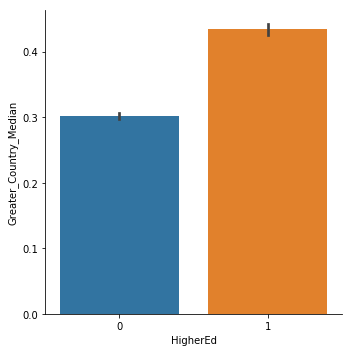

In [114]:
B = sns.catplot(data=df2,x='HigherEd',y='Greater_Country_Median',kind='bar',aspect=1)

However, if we look at graph 2 (below) i.e. higher education can only help you in getting higher salaries in the first few years of your career. As your work experience increases, education does not play significant role.

<b>After 9 years of work experience (coded as 4), your education does not matter in getting salary greater than their country's median salary.

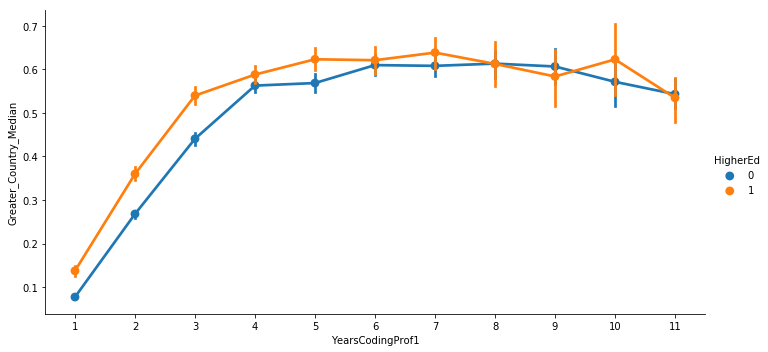

In [115]:
B = sns.catplot(data=df2,x='YearsCodingProf1',y='Greater_Country_Median',kind='point',aspect=2, hue ='HigherEd')

# <u><b>6. Managerial Insights

<b>For freshers</b>, if you do master's you can earn higher than your colleagues at the start of your career. However, in long run your experience determines your salaries.

<b>For working professional</b> with more than 9 years of experience, there is no advantage in terms of salaries. So, for these people doing master's is not desirable in orde to increase their salary.

# <u>7. Appendix - Decision Tree

The below decision tree also indicates that the people with higher work experience have higher probability of earning salaries greater than their country's median salary.

In [94]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [95]:
Y = Df_cluster.cluster
#X = Df_cluster.drop(columns=['Greater_Country_Median','cluster'])
X = Df_cluster.drop(columns=['Greater_Country_Median','cluster'])

In [96]:
dt = tree.DecisionTreeClassifier(max_depth = 2)
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

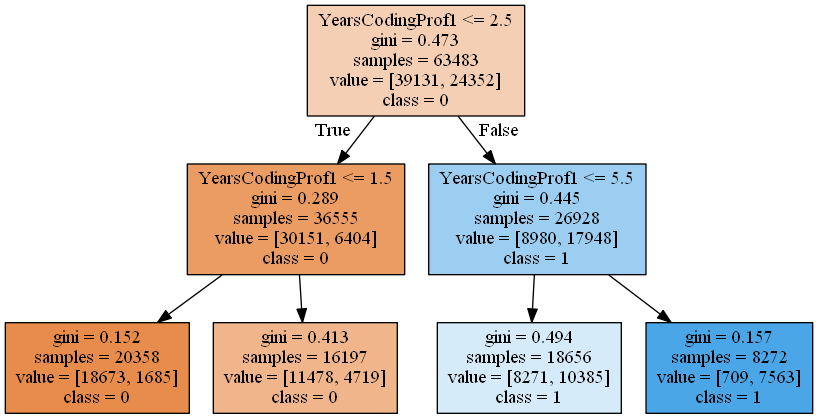

In [97]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

------------------------- END OF THE DOCUMENT -------------------------